In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

In [80]:
iris=datasets.load_iris()
iris_X=iris.data
iris_y=iris.target
print('numbers of classes: %d' % len(np.unique(iris_y)))
print('numbers of data points: %d' % len(iris_X))
X0=iris_X[iris_y==0,:]
print('Samples of class 0: ', X0[:5,:])
X1=iris_X[iris_y==1,:]
print('Samples of class 1: ', X1[:5,:])
X2=iris_X[iris_y==2,:]
print('Samples of class 2: ', X2[:5,:])

numbers of classes: 3
numbers of data points: 150
Samples of class 0:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Samples of class 1:  [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]
Samples of class 2:  [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_X,iris_y, test_size=50)
print(X_train.shape)


(100, 4)


In [82]:
clf=neighbors.KNeighborsClassifier(p=2, n_neighbors=1)
fitted=clf.fit(X_train,y_train)
y_hat=fitted.predict(X_test)
print('Predicted labels: ',y_hat[20:40])
print('Ground truth    : ',y_test[20:40])

Predicted labels:  [2 1 0 0 1 1 2 0 1 0 2 0 2 1 2 0 1 1 2 0]
Ground truth    :  [2 1 0 0 1 1 2 0 2 0 2 0 2 1 2 0 1 1 2 0]


In [83]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f%%' % (100*accuracy_score(y_test,y_hat)))

Accuracy: 98.00%


In [84]:
# weight='uniform' (default)
Ks=range(1,12)
accs_u= np.empty(len(Ks)) # accuracies
for k in Ks:
    clf=neighbors.KNeighborsClassifier(n_neighbors=k, p=2).fit(X_train, y_train)
    y_hat=clf.predict(X_test)
    accs_u[k-1]=100*accuracy_score(y_test,y_hat)
print('Accuracy score with k from 1 to 12:', accs_u)
print('The best accuracy score: {0}% with k = {1}'.format(max(accs_u),accs_u.argmax()+1))

Accuracy score with k from 1 to 12: [98. 96. 98. 98. 98. 96. 98. 98. 98. 94. 98.]
The best accuracy score: 98.0% with k = 1


In [85]:
# weight='distance'
accs_d= np.empty(len(Ks)) # accuracies
for k in Ks:
    clf=neighbors.KNeighborsClassifier(n_neighbors=k, p=2, weights='distance').fit(X_train, y_train)
    y_hat=clf.predict(X_test)
    accs_d[k-1]=100*accuracy_score(y_test,y_hat)
print('Accuracy score with k from 1 to 12:', accs_d)
print('The best accuracy score: {0}% with k = {1}'.format(max(accs_d),accs_d.argmax()+1))

Accuracy score with k from 1 to 12: [ 98.  98.  98.  98.  98.  98.  98. 100.  98.  98.  98.]
The best accuracy score: 100.0% with k = 8


In [86]:
# define my weight 
def myweight(distance):
    sigma2=0.5
    return np.exp(-distance**2/sigma2)

In [87]:
# weight='myweight'
accs_m= np.empty(len(Ks)) # accuracies
for k in Ks:
    clf=neighbors.KNeighborsClassifier(n_neighbors=k, p=2, weights=myweight).fit(X_train, y_train)
    y_hat=clf.predict(X_test)
    accs_m[k-1]=100*accuracy_score(y_test,y_hat)
print('Accuracy score with k from 1 to 12:', accs_m)
print('The best accuracy score: {0}% with k = {1}'.format(max(accs_m),accs_m.argmax()+1))

Accuracy score with k from 1 to 12: [98. 98. 98. 98. 98. 98. 96. 98. 96. 98. 96.]
The best accuracy score: 98.0% with k = 1


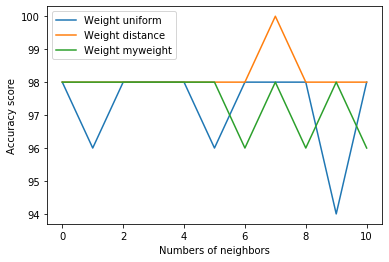

In [88]:
#plot result
plt.plot(accs_u)
plt.plot(accs_d)
plt.plot(accs_m)
plt.xlabel('Numbers of neighbors')
plt.ylabel('Accuracy score')
plt.legend(('Weight uniform','Weight distance', 'Weight myweight'))
plt.show()